In [1]:
# Let's begin by importing what we'll need (You'll probably be copying and pasting this a lot)

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
#rug plot or carpet plot
dataset = randn(25)

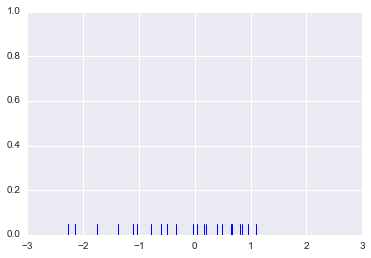

In [3]:
sns.rugplot(dataset)

In [4]:
dataset = randn(25)

In [5]:
dataset

array([ 1.71663068, -0.12871487,  0.06140583,  0.32024156, -0.2344258 ,
       -1.47050105, -0.13652479, -0.13407507, -0.28301486, -0.50290567,
        0.20022944, -1.19152914,  2.49241937,  2.05525959, -0.13244777,
        0.01993849,  0.83626265,  1.34135221,  1.06460266, -0.13871185,
        0.80561079, -0.52600847, -0.16755909,  0.7560689 ,  1.737999  ])

In [7]:
sns.rugplot(dataset)
plt.ylim(0,1)

(0, 1)

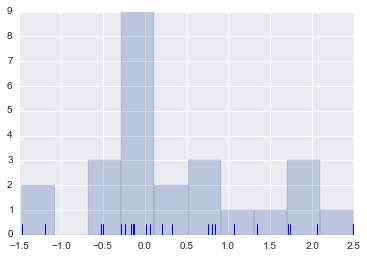

In [8]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

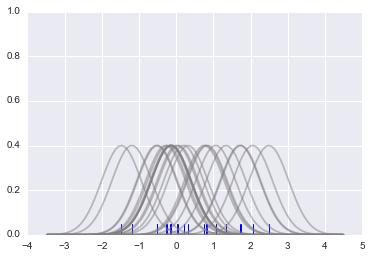

In [15]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

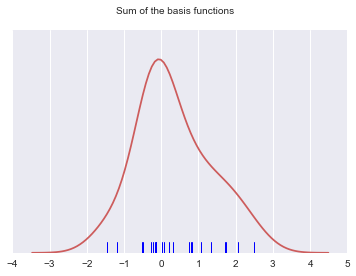

In [17]:
sum_of_kde =np.sum(kernel_list,axis=0)
fig =plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

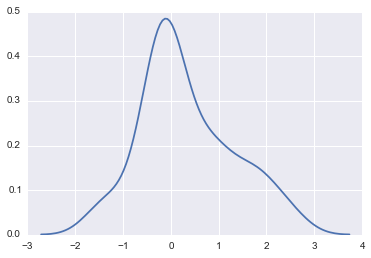

In [18]:
sns.kdeplot(dataset)

In [19]:
sns.rugplot(dataset,color="black")
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [ ]:
url =" wikipedia/kernel statsistics"

In [22]:
kernel_options =['biw','cos','epa','gau','tri','triw']

In [24]:
kernel_options =['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel =kern,label=kern,shade=True)

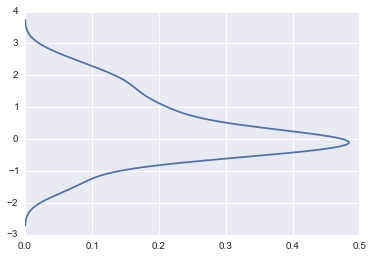

In [26]:
#plot on verticle axis
sns.kdeplot(dataset,vertical=True)

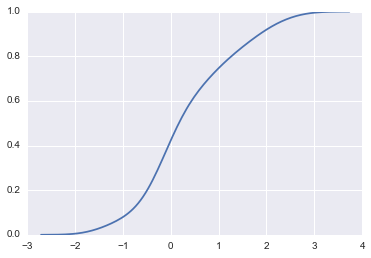

In [27]:
#cumulative distribution function
sns.kdeplot(dataset,cumulative = True)

In [28]:
#multiple data
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 =np.random.multivariate_normal(mean,cov,1000)

In [29]:
dFrame = pd.DataFrame(dataset2,columns=['x','y'])

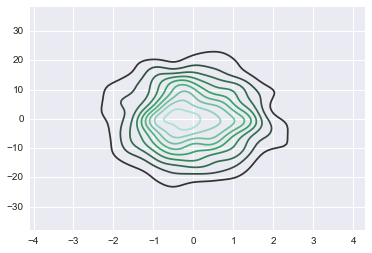

In [30]:
sns.kdeplot(dFrame)

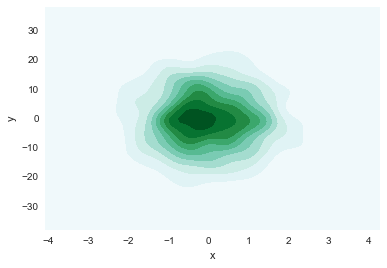

In [32]:
sns.kdeplot(dFrame.x,dFrame.y,shade=True)

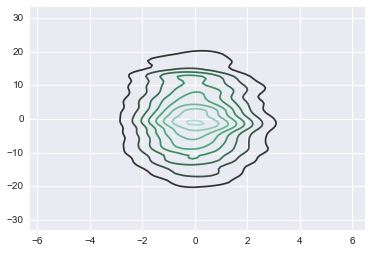

In [33]:
sns.kdeplot(dFrame,bw=1)

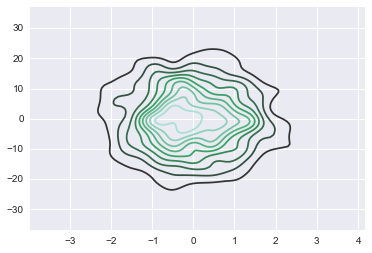

In [34]:
sns.kdeplot(dFrame,bw='silverman')

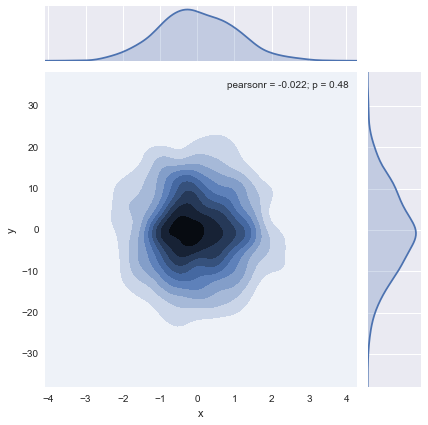

In [36]:
sns.jointplot('x','y',dFrame,kind='kde')